# PS4

## Laurence Warner

### 1

#### a

In [19]:
import pandas as pd

In [20]:
auto_data = pd.read_csv("Auto.csv")

In [21]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


'?'  in row 32.

In [22]:
auto_data = pd.read_csv("Auto.csv", na_values = '?')  #convert to NaN

In [23]:
auto_data.loc[32]

mpg                     25
cylinders                4
displacement            98
horsepower             NaN
weight                2046
acceleration            19
year                    71
origin                   1
name            ford pinto
Name: 32, dtype: object

Horsepower now 'NaN'

#### b

In [24]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Include non-quantitative variables

In [25]:
auto_data.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000,NaN


In [26]:
from pandas.plotting import scatter_matrix

In [27]:
import matplotlib

In [28]:
%matplotlib inline

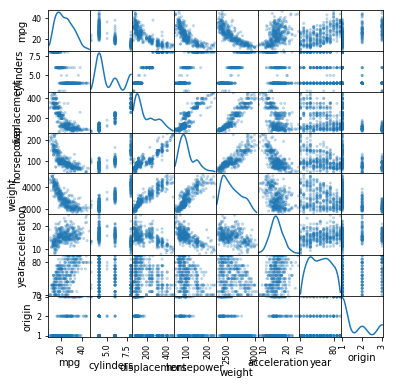

In [29]:
s_m = scatter_matrix(auto_data, alpha = 0.3, figsize = (6,6), diagonal = 'kde')

#### c

In [30]:
c = auto_data.corr()
c

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [31]:
import seaborn as sb

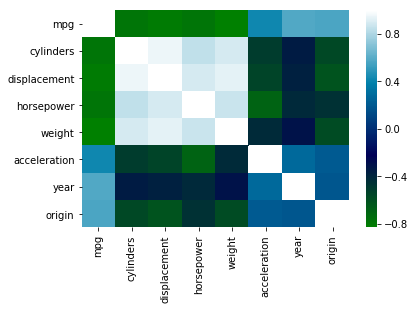

In [32]:
sb.heatmap(c, cmap = 'ocean')

In [33]:
sb.heatmap?

#### d

##### i 

In [34]:
import statsmodels.api as sm

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Run OLS

Remove qualitative data

In [35]:
quant = auto_data.drop('name', axis = 1)

In [36]:
quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [37]:
y = quant['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

Add constant column and remove mpg

In [38]:
quant = sm.add_constant(quant)
X = quant.drop('mpg', axis = 1)

In [39]:
X.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,8,307.0,130.0,3504,12.0,70,1
1,1.0,8,350.0,165.0,3693,11.5,70,1
2,1.0,8,318.0,150.0,3436,11.0,70,1
3,1.0,8,304.0,150.0,3433,12.0,70,1
4,1.0,8,302.0,140.0,3449,10.5,70,1


In [40]:
ols = sm.OLS(endog = y, exog = X, missing= 'drop')

In [41]:
res = ols.fit()

In [42]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 07 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        10:44:26   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

Stat sig at 1% level (p-vals in brackets): const(0), displacement(0.8%), weight(0), year(0), origin(0)

##### ii 

Not stag sig at 10& level (p-vals in brackets): cylinders (12.8%), horsepower(22%), acceleration(41.5%)

##### iii 

Ceteris paribus, if a car was made one year later, the we expect the car to get 0.75 more miles per gallon.

#### e 

Displacement, horsepower, weight: all look like they should have a quadratic term.

In [43]:
X['displacement_sq'] = X['displacement']**2

In [44]:
X['horsepower_sq'] = X['horsepower']**2

In [45]:
X['weight_sq'] = X['weight']**2

In [46]:
X['acceleration_sq'] = X['acceleration']**2

In [47]:
X.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin,displacement_sq,horsepower_sq,weight_sq,acceleration_sq
0,1.0,8,307.0,130.0,3504,12.0,70,1,94249.0,16900.0,12278016,144.00
1,1.0,8,350.0,165.0,3693,11.5,70,1,122500.0,27225.0,13638249,132.25
2,1.0,8,318.0,150.0,3436,11.0,70,1,101124.0,22500.0,11806096,121.00
3,1.0,8,304.0,150.0,3433,12.0,70,1,92416.0,22500.0,11785489,144.00
4,1.0,8,302.0,140.0,3449,10.5,70,1,91204.0,19600.0,11895601,110.25


In [48]:
ols = sm.OLS(endog = y, exog = X, missing= 'drop')

In [49]:
res = ols.fit()

In [50]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Wed, 07 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        10:44:26   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.1084      6.696     

##### ii 

Adj. R-squared = 0.866. vs. 0.818 from d. Improvement!

##### iii 

Displacement:
Coeff: from positive to negative.
BUT: p-value: from 0.8% to 40%. No longer statistically significant linear effect. 

Cylinders:
coeff: from negative to positive.
p-value: from 12.8% to 44%. Still not significant.

#### f 

In [52]:
X.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin,displacement_sq,horsepower_sq,weight_sq,acceleration_sq
0,1.0,8,307.0,130.0,3504,12.0,70,1,94249.0,16900.0,12278016,144.00
1,1.0,8,350.0,165.0,3693,11.5,70,1,122500.0,27225.0,13638249,132.25
2,1.0,8,318.0,150.0,3436,11.0,70,1,101124.0,22500.0,11806096,121.00
3,1.0,8,304.0,150.0,3433,12.0,70,1,92416.0,22500.0,11785489,144.00
4,1.0,8,302.0,140.0,3449,10.5,70,1,91204.0,19600.0,11895601,110.25


In [53]:
PRED = [1, 6, 200, 100, 3100, 15.1, 1999, 1, 200**2, 100**2, 3100**2, 15.1**2]

In [54]:
Y_PRED = res.predict(exog = PRED)
Y_PRED[0].round(2)

1522.55

1522.55 mpg

In [55]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

Way too high!! Realised mistake: year doesn't have 19 appended before.

In [56]:
PRED[6] = 99

In [57]:
Y_PRED = res.predict(exog = PRED)
Y_PRED[0]

38.732111096553041

39 miles per gallon: high! Top quartile of mpg.

### 2 

### a 

In [58]:
import numpy as np

In [59]:
obs = np.arange(7)
obs = obs[1:]
obs

array([1, 2, 3, 4, 5, 6])

In [60]:
l = [3.0, 2.0, np.sqrt(10), np.sqrt(5), np.sqrt(2), np.sqrt(3)]

In [61]:
dist = np.array(l)
dist

array([ 3.        ,  2.        ,  3.16227766,  2.23606798,  1.41421356,
        1.73205081])

#TODO create data frame

#### b 

In [62]:
min(dist)

1.4142135623730951

X5 is the nearest. Therefore KNN prediction: Green.

#### c 

X 2,5,6 are nearest three. Prediction: Red.

#### d 

Highly non-linear: expect best K to be small. Then decision boundary will be sensitive to local changes. 

#### e 

In [63]:
X_train = dist

In [64]:
X_train

array([ 3.        ,  2.        ,  3.16227766,  2.23606798,  1.41421356,
        1.73205081])

In [65]:
X1 = [0,2,0,0,-1,1]

#TODO part e

### 3 

#### a 

In [66]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [67]:
auto_data['mpg_binary'] = 0

In [68]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


In [73]:
med = np.median(auto_data.mpg)
med

23.0

In [70]:
for i in range(len(auto_data)):
    if auto_data.mpg.iloc[i] >= med:
        auto_data.mpg_binary.iloc[i] = 1

/Users/laurencewarner/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,0


In [78]:
quant = auto_data.drop(['mpg','name'], axis = 1)

In [162]:
quant.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_binary
0,1.0,8,307.0,130.0,3504,12.0,70,1,0
1,1.0,8,350.0,165.0,3693,11.5,70,1,0
2,1.0,8,318.0,150.0,3436,11.0,70,1,0
3,1.0,8,304.0,150.0,3433,12.0,70,1,0
4,1.0,8,302.0,140.0,3449,10.5,70,1,0


In [164]:
quant_nonull = quant.dropna()
len(quant_nonull)

392

In [166]:
y = quant_nonull['mpg_binary']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: mpg_binary, dtype: int64

Add constant column and remove mpg

In [167]:
quant_nonull = sm.add_constant(quant_nonull)
X = quant_nonull.drop('mpg_binary', axis = 1)

In [168]:
X.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,8,307.0,130.0,3504,12.0,70,1
1,1.0,8,350.0,165.0,3693,11.5,70,1
2,1.0,8,318.0,150.0,3436,11.0,70,1
3,1.0,8,304.0,150.0,3433,12.0,70,1
4,1.0,8,302.0,140.0,3449,10.5,70,1


### b 

In [161]:
from sklearn.cross_validation import train_test_split

Prepare data as numpy arrays

In [170]:
X_vals = X.values
y_vals = y.values

In [171]:
X_vals

array([[   1. ,    8. ,  307. , ...,   12. ,   70. ,    1. ],
       [   1. ,    8. ,  350. , ...,   11.5,   70. ,    1. ],
       [   1. ,    8. ,  318. , ...,   11. ,   70. ,    1. ],
       ..., 
       [   1. ,    4. ,  135. , ...,   11.6,   82. ,    1. ],
       [   1. ,    4. ,  120. , ...,   18.6,   82. ,    1. ],
       [   1. ,    4. ,  119. , ...,   19.4,   82. ,    1. ]])

In [172]:
X_tr, X_te, y_tr, y_te = train_test_split(X_vals, y_vals, test_size = 0.5, random_state = 10)

In [173]:
l = [X_tr, X_te, y_tr, y_te]

In [174]:
for i in l:
    print(len(i))

196
196
196
196


Of 392 total data points: 196 training, 196 testing.

In [175]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [176]:
LR = LogisticRegression()

In [177]:
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
LR.fit(X_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [188]:
c = LR.coef_[0]

In [193]:
print("Beta 0: {}, Betas 1-7: {}".format(c[0], c[1:8]))

Beta 0: -0.07298574694992134, Betas 1-7: [-0.69748866  0.00639616 -0.0373256  -0.0050477  -0.13472044  0.29956553
 -0.15659246]


In [194]:
X_tr, X_te, y_tr, y_te = train_test_split(X_vals, y_vals, test_size = 0, random_state = 10)

In [195]:
l = [X_tr, X_te, y_tr, y_te]

In [196]:
for i in l:
    print(len(i))

392
0
392
0


Of 392 total data points: 196 training, 196 testing.

In [197]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [198]:
LR = LogisticRegression()

In [199]:
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [200]:
LR.fit(X_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
c = LR.coef_[0]

In [202]:
print("Beta 0: {}, Betas 1-7: {}".format(c[0], c[1:8]))

Beta 0: -0.05430317580234274, Betas 1-7: [-0.07310269 -0.00543126 -0.07543257 -0.00282534 -0.22790656  0.26201797
  0.15953297]


#### a 

In [205]:
LogitModel = sm.Logit(endog = y, exog = X)

In [206]:
fit = LogitModel.fit()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


In [207]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             mpg_binary   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 07 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        19:09:57   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""